In [26]:
import pandas as pd
import scipy
from scipy import stats
from scipy.stats import mannwhitneyu
import pingouin as pg

In [27]:
results_level_a = pd.read_csv('Results_level_A.csv')

In [28]:
results_level_a.head(5)

,MNB,SVC,RandomForests,DecisionTreeClassifier,LSTM
0,61.19,89.54,69.08,68.62,91.00
1,61.19,89.76,70.44,68.62,90.87
2,61.19,87.00,68.55,68.62,91.00
3,61.19,88.43,68.55,68.62,91.00
4,61.19,88.76,67.98,68.62,91.00


In [29]:
results_level_a.describe()

,MNB,SVC,RandomForests,DecisionTreeClassifier,LSTM
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,61.321000,88.415000,69.407000,68.650000,90.875000
std,0.339753,0.990872,1.190929,0.475628,0.351986
min,61.110000,87.000000,67.980000,67.770000,89.880000
25%,61.190000,87.640000,68.682500,68.620000,91.000000
50%,61.190000,88.430000,69.110000,68.620000,91.000000
75%,61.190000,89.345000,69.777500,68.620000,91.000000
max,62.230000,89.760000,72.140000,69.770000,91.000000


<AxesSubplot:>

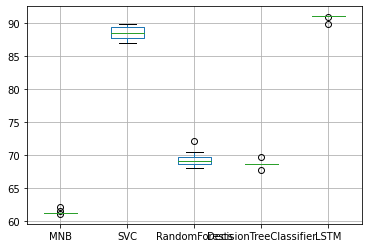

In [30]:
results_level_a.boxplot(column=['MNB','SVC','RandomForests','DecisionTreeClassifier','LSTM'])

# Hypothesis Testing

- Null hypothesis (H0) - Significant difference between two samples of accuracies.
- Alternate hypothesis (H1) - No significant difference between two samples of accuracies.
- t-test is used for the same, as the classifiers are run on the same dataset, we perform paired t-test.
- p-value is P(D|H0), so smaller the p-value, more confident we are of Null Hypothesis being false.
- If they are below siginificance level like 0.05 or 0.01 then we can reject the null hypothesis.

In [31]:
print("mean Accuracy of MNB:",results_level_a['MNB'].mean())
print("mean Accuracy of SVC:",results_level_a['SVC'].mean())
print("mean Accuracy of RandomForests:",results_level_a['RandomForests'].mean())
print("mean Accuracy of DecisionTreeClassifier:",results_level_a['DecisionTreeClassifier'].mean())
print("mean Accuracy of LSTM:",results_level_a['LSTM'].mean())

mean Accuracy of MNB: 61.321000000000005
mean Accuracy of SVC: 88.415
mean Accuracy of RandomForests: 69.40700000000001
mean Accuracy of DecisionTreeClassifier: 68.65
mean Accuracy of LSTM: 90.875


# Pairwise T-Tests and Mann-Whitney U tests

Let us perform T-Test between MNB and SVC

In [32]:
stats.ttest_rel(results_level_a.iloc[:,0], results_level_a.iloc[:,1])

Ttest_relResult(statistic=-72.59567241585493, pvalue=9.029063878293435e-14)

In [39]:
stat, p_value = mannwhitneyu(results_level_a.iloc[:,0],results_level_a.iloc[:,1])
print('Statistics=%.5f, p=%.5f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Statistics=0.00000, p=0.00013
Reject Null Hypothesis (Significant difference between two samples)


As we can see from the previous cell the mean accuracy of the SVC is 88.415 and MNB is 61.32, P-value being 0.000
P-value is less than the significance level of 0.05, rejecting the NULL hypothesis, SVC is performing better than MNB

Let us perform T-tests and Mann-Whitney U tests between SVC and LSTM

In [34]:
stats.ttest_rel(results_level_a.iloc[:,1], results_level_a.iloc[:,4])

Ttest_relResult(statistic=-6.517664848272553, pvalue=0.00010918666018625776)

In [40]:
stat, p_value = mannwhitneyu(results_level_a.iloc[:,1],results_level_a.iloc[:,4])
print('Statistics=%.5f, p=%.5f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Statistics=0.00000, p=0.00011
Reject Null Hypothesis (Significant difference between two samples)


As we can see from the previous cell the mean accuracy of the SVC is 88.415 and LSTM is 90.875, P-value being 0.000
P-value is less than the significance level of 0.05, rejecting the NULL hypothesis, LSTM is performing better than SVC

Let us perform the T-tests and Mann-Whitney U tests on RFC and LSTM

In [36]:
stats.ttest_rel(results_level_a.iloc[:,2], results_level_a.iloc[:,4])

Ttest_relResult(statistic=-55.46474201073875, pvalue=1.012809161172273e-12)

In [41]:
stat, p_value = mannwhitneyu(results_level_a.iloc[:,2],results_level_a.iloc[:,4])
print('Statistics=%.5f, p=%.5f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Statistics=0.00000, p=0.00011
Reject Null Hypothesis (Significant difference between two samples)


As we can see from the previous cell the mean accuracy of the RFC is 69.40 and LSTM is 90.875, P-value being 0.000
P-value is less than the significance level of 0.05, rejecting the NULL hypothesis, LSTM is performing better than RFC

## From these tests and box plots and mean accuracies values we can see that for level A LSTM is the best performing among the lot